In [ ]:

# Group No - 206

# Bits ID :
# 2023AC05830 - Vidhya Dilip Korgaoker
# 2023AC05796 - Sagar Mahapatro
# 2023AD05101 - Kaustav Biswas
# 2023AC05645 - Abhinav Gazta

# Problem Statement - Analysis on Weather Data



Load file path  ./datasets/weatherAUS.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  

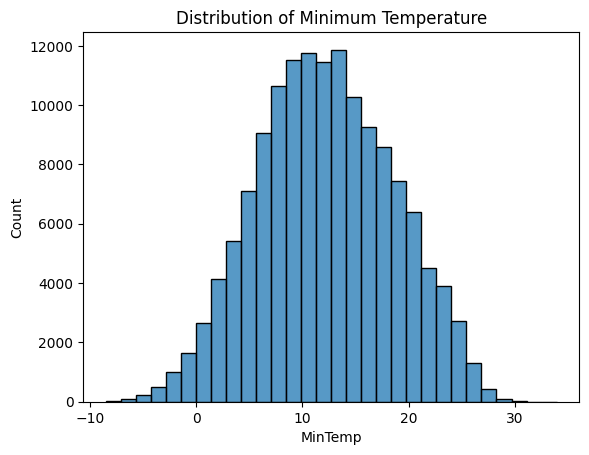

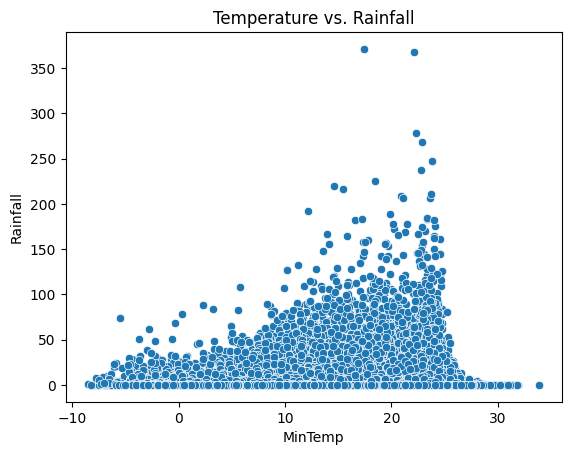

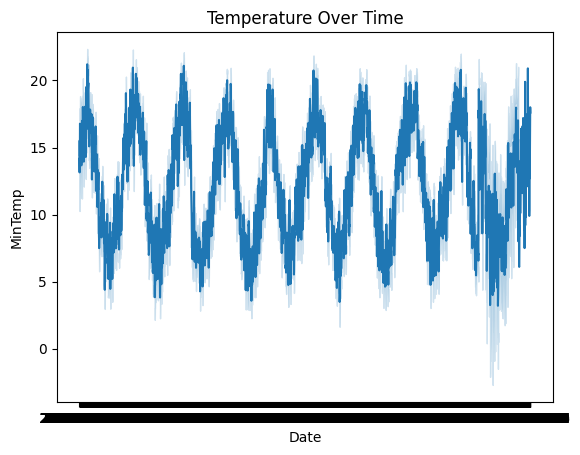

 
 The correlation result
 -: MinTemp          0.074597
MaxTemp         -0.145877
Rainfall         0.224268
Evaporation     -0.109716
Sunshine        -0.408096
WindGustSpeed    0.206299
WindSpeed9am     0.070565
WindSpeed3pm     0.072610
Humidity9am      0.233368
Humidity3pm      0.406050
Pressure9am     -0.226648
Pressure3pm     -0.208366
Cloud9am         0.291214
Cloud3pm         0.355419
Temp9am         -0.025140
Temp3pm         -0.176824
dtype: float64 
 Axes(0.125,0.11;0.775x0.77)


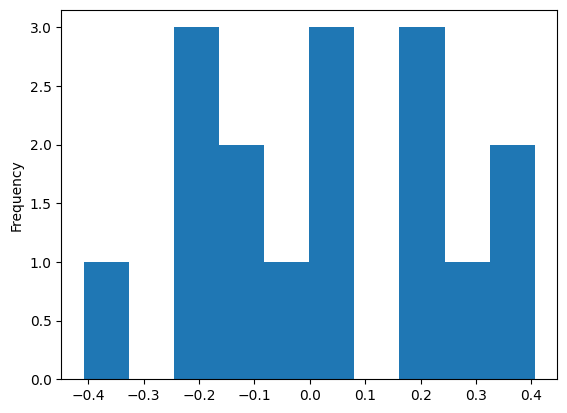

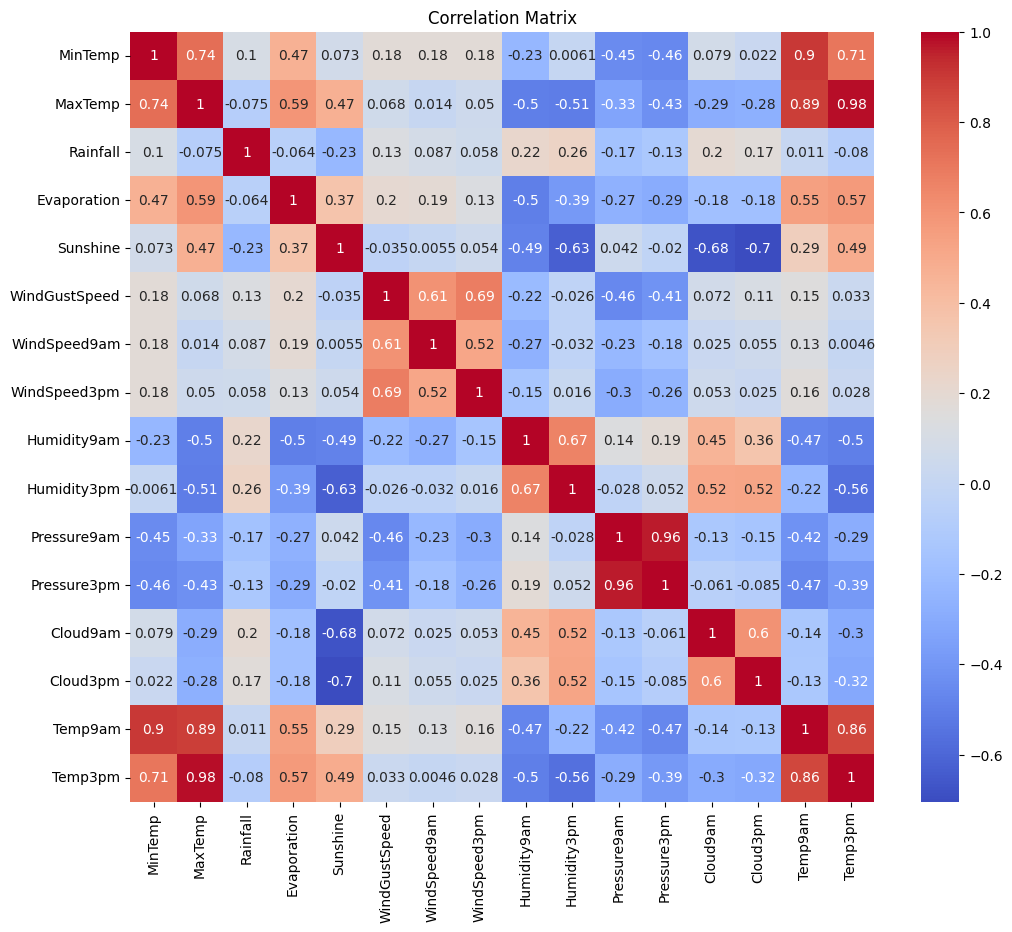

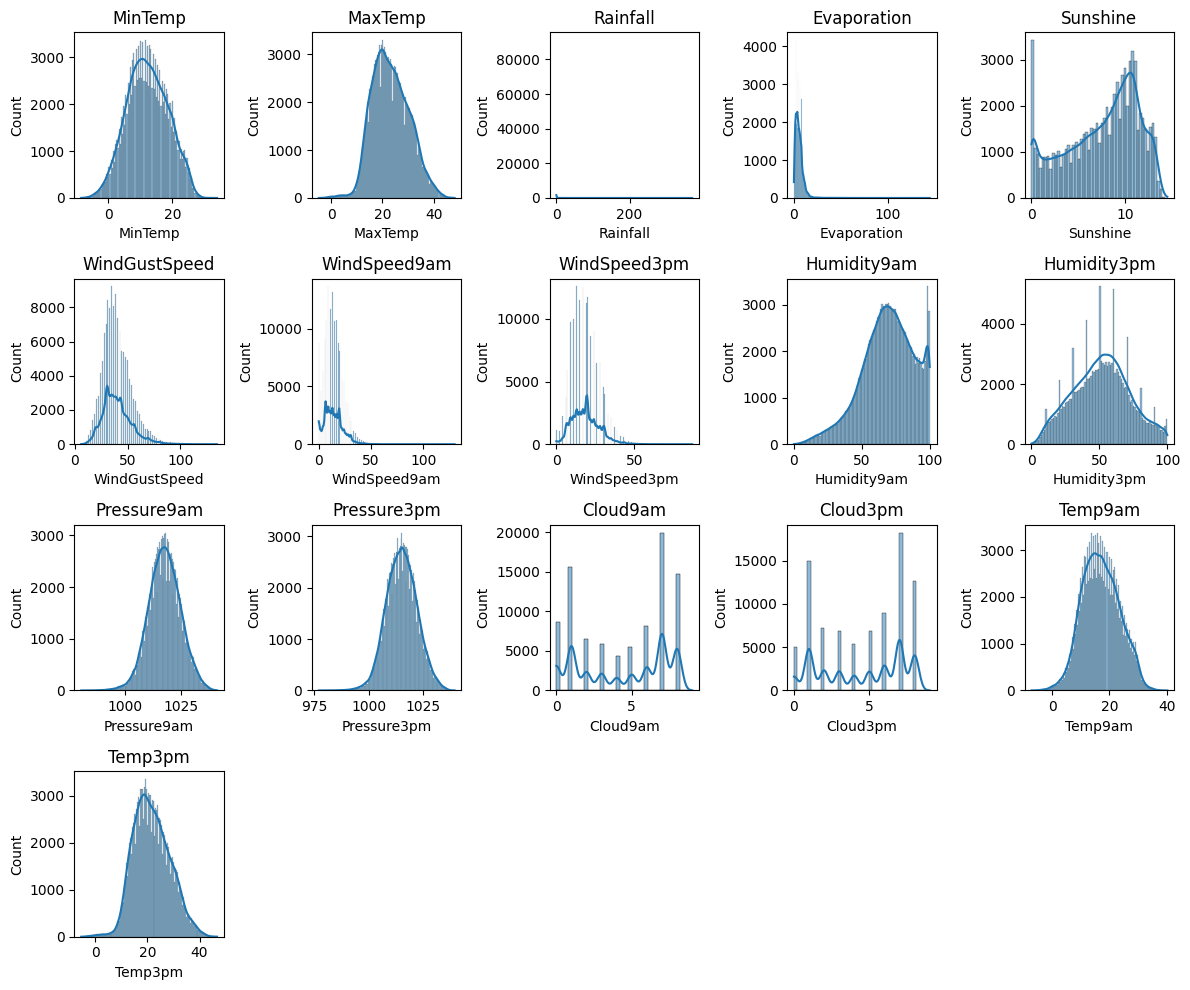

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Cloud9am  Cloud3pm  Temp9am  \
0           W           44.0          W  ...      8.0       NaN     16.9   
1         WNW           44.0        NNW  ...      NaN       NaN     17.2   

   Temp3pm  RainToday  RainTomorrow  Year  Month  Day  TempDiff  
0     21.8         No             0  2008     12    1       9.5  
1     24.3         No             0  2008     12    2      17.7  

[2 rows x 27 columns]


In [7]:

import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer


load_file_path = './datasets/weatherAUS.csv'
print("Load file path ", load_file_path)
weatherDF = pd.read_csv(load_file_path)
#  details on the weather data set
weatherDF.info()
print(weatherDF.describe())
# Print the first two rows of the dataset..as mentioned part of assigment 
weatherDF.head(2)
# weather data...

# Visulaization
sns.histplot(weatherDF['MinTemp'], bins=30)
plt.title('Distribution of Minimum Temperature')
plt.show()

# Scatter plot of temperature vs. rainfall
sns.scatterplot(x='MinTemp', y='Rainfall', data=weatherDF)
plt.title('Temperature vs. Rainfall')
plt.show()

# Line chart of temperature over time
sns.lineplot(x='Date', y='MinTemp', data=weatherDF)
plt.title('Temperature Over Time')
plt.show()

# Heatmap of correlations , drop some columns for easy correlation.
numeric_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                'Temp9am', 'Temp3pm']

corrMatrix = weatherDF[numeric_cols]
weatherDF['RainTomorrow'] = weatherDF['RainTomorrow'].astype('category').cat.codes
corrResult = corrMatrix.corrwith(weatherDF['RainTomorrow'])
print(" \n The correlation result\n -:", corrResult, "\n", corrResult.plot(kind="hist"))
plt.figure(figsize=(12, 10))
sns.heatmap(corrMatrix.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Other plots as part of EDA for the data given. 

plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 5, i+1)
    sns.histplot(weatherDF[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Create new features , preprocessing and feature engineering...
# Extract year, month, and day from the 'Date' column
weatherDF['Year'] = pd.to_datetime(weatherDF['Date']).dt.year
weatherDF['Month'] = pd.to_datetime(weatherDF['Date']).dt.month
weatherDF['Day'] = pd.to_datetime(weatherDF['Date']).dt.day

# Calculate the difference between max and min temperature
weatherDF['TempDiff'] = weatherDF['MaxTemp'] - weatherDF['MinTemp']

# Perform imputation for missing values
print(weatherDF.head(2))

imputer = SimpleImputer(strategy='mean')
numeric_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                'Temp9am', 'Temp3pm']
weatherDF[numeric_cols] = imputer.fit_transform(weatherDF[numeric_cols])

# Log transform skewed features
skewed_features = ['Rainfall', 'Evaporation']
weatherDF[skewed_features] = np.log1p(weatherDF[skewed_features])

# Drop unnecessary columns
weatherDF.drop([ 'Date'], axis=1, inplace=True)

# Encode categorical variables
categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
data = pd.get_dummies(weatherDF, columns=categorical_cols, drop_first=True)

# Handle missing values (replace 'NA' with appropriate values)
data = weatherDF.fillna(0)  # Example: Replace 'NA' with 0 for rainfall

# Define features for standardization and normalization
standardize_cols = ['MinTemp', 'MaxTemp','Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 
                    'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm','Temp9am', 'Temp3pm']
normalize_cols = ['Cloud9am', 'Cloud3pm']  # Example: Normalize cloud coverage

# Standardize features
scaler = StandardScaler()
weatherDF[standardize_cols] = scaler.fit_transform(data[standardize_cols])

# Normalize features
scaler = MinMaxScaler()
weatherDF[normalize_cols] = scaler.fit_transform(data[normalize_cols])

weatherDF.head(5)


# Load the dataset
#file_path = '/Users/kaustavbiswas/Downloads/weatherAUS.csv'
df = pd.read_csv(load_file_path)

# Dropping columns with more than 40% missing data
df_dropped = df.drop(columns=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'])

# Imputing missing values for numerical columns using median
numerical_columns = df_dropped.select_dtypes(include=['float64']).columns
df_dropped[numerical_columns] = df_dropped[numerical_columns].fillna(df_dropped[numerical_columns].median())

# Imputing missing values for categorical columns using mode
categorical_columns = df_dropped.select_dtypes(include=['object']).columns
df_dropped[categorical_columns] = df_dropped[categorical_columns].fillna(df_dropped[categorical_columns].mode().iloc[0])

# Handling skewness by applying log transformation to highly skewed columns
df_dropped['Rainfall'] = np.log1p(df_dropped['Rainfall'])  # log1p is used to avoid log(0)
df_dropped['WindGustSpeed'] = np.log1p(df_dropped['WindGustSpeed'])

# Encoding categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df_dropped, drop_first=True)

# Separating features and target variable
if 'RainTomorrow_Yes' in df_encoded.columns:
    X = df_encoded.drop('RainTomorrow_Yes', axis=1)
    y = df_encoded['RainTomorrow_Yes']
else:
    X = df_encoded.drop('RainTomorrow', axis=1)
    y = df_encoded['RainTomorrow']

# Standardization
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Feature Importance using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)
importances = rf.feature_importances_
feature_names = X_scaled.columns

# Create a dataframe for feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Selecting top 20 features
top_features = feature_importances.head(20)['Feature'].tolist()
X_selected = X_scaled[top_features]

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.4, random_state=42)

# Combining the cleaned and selected features with the target variable for final output
final_df_train = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
final_df_test = pd.concat([X_test, y_test.reset_index(drop=True)], axis=1)

# Saving the cleaned datasets to CSV files
#train_file_path = 'cleaned_weather_train.csv'
#test_file_path = 'cleaned_weather_test.csv'

#final_df_train.to_csv(train_file_path, index=False)
#final_df_test.to_csv(test_file_path, index=False)

#print(f'Train file saved to {train_file_path}')
#print(f'Test file saved to {test_file_path}')


In [6]:
y_train

NameError: name 'y_train' is not defined

In [8]:
#KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

mean_acc = np.zeros(10)
for i in range(1,11):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc
 # for data visualiztions


oc = np.arange(1,11,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,11), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()
from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
g_res = gs.fit(X_train, y_train)
print("score", g_res.best_score_)
print(" params ", g_res.best_params_)
knn = KNeighborsClassifier(n_neighbors = 15, weights = 'distance',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))